In [1]:
#Package Imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import csv
from collections import Counter
from numpy import sqrt
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#Import CSV

whalecsv = Path(r"C:\Users\Oluwa\GITHUB\Bootcamp\UTOR-VIRT-FIN-PT-08-2023-U-LOLC\04-Pandas\Unit 4 Homework\Instructions\Starter_Code\Resources\whale_returns.csv")
algocsv= Path(r"C:\Users\Oluwa\GITHUB\Bootcamp\UTOR-VIRT-FIN-PT-08-2023-U-LOLC\04-Pandas\Unit 4 Homework\Instructions\Starter_Code\Resources\algo_returns.csv")
SPcsv= Path(r"C:\Users\Oluwa\GITHUB\Bootcamp\UTOR-VIRT-FIN-PT-08-2023-U-LOLC\04-Pandas\Unit 4 Homework\Instructions\Starter_Code\Resources\sp_tsx_history.csv")
NVDAcsv = Path(r"C:\Users\Oluwa\GITHUB\Bootcamp\ASSIGNMENTS\Unit 4 Assignment\Unit4\Sheets_CSVs\NVDA.csv")
FLWScsv = Path(r"C:\Users\Oluwa\GITHUB\Bootcamp\ASSIGNMENTS\Unit 4 Assignment\Unit4\Sheets_CSVs\FLWS.csv")
AMDcsv = Path(r"C:\Users\Oluwa\GITHUB\Bootcamp\ASSIGNMENTS\Unit 4 Assignment\Unit4\Sheets_CSVs\AMD.csv")

#Create Dateframes
whales = pd.read_csv(whalecsv)
algo = pd.read_csv(algocsv)
SP500 = pd.read_csv(SPcsv)

In [3]:
#Read Whale CSV
whales.head

<bound method NDFrame.head of             Date  SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
0     2015-03-02                        NaN                 NaN   
1     2015-03-03                  -0.001266           -0.004981   
2     2015-03-04                   0.002230            0.003241   
3     2015-03-05                   0.004016            0.004076   
4     2015-03-06                  -0.007905           -0.003574   
...          ...                        ...                 ...   
1055  2019-04-25                  -0.000285           -0.001291   
1056  2019-04-26                   0.008149            0.009162   
1057  2019-04-29                   0.001254            0.002719   
1058  2019-04-30                  -0.001295           -0.002211   
1059  2019-05-01                  -0.005847           -0.001341   

      TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
0                             NaN                     NaN  
1                       -0.000496            

In [4]:
#Counting Empty Rows assuming 0 values do not count as null

emptyWhales=0
for x in whales.index:
    if (whales.isna().iloc[x,1] 
        and whales.isna().iloc[x,2] 
        and whales.isna().iloc[x,3] 
        and whales.isna().iloc[x,4]):
        emptyWhales=(emptyWhales + 1)
        
    #if sum(whales.iloc[x,1:4]) == 0:
        #emptyWhales=(emptyWhales + 1)
            
print(emptyWhales)

1


In [5]:
#Counting Empty Cells assuming 0 values do not count as null

emptyCells=0
for x in whales.index:
    if whales.isna().iloc[x,0]:
        emptyCells=(emptyCells + 1)
        
    if whales.isna().iloc[x,1]:
        emptyCells=(emptyCells + 1)
        
    if whales.isna().iloc[x,2]:
        emptyCells=(emptyCells + 1)
        
    if whales.isna().iloc[x,3]:
        emptyCells=(emptyCells + 1)
        
    if whales.isna().iloc[x,4]:
        emptyCells=(emptyCells + 1)
        
    
print(emptyCells)

4


In [6]:
#Identifying Nulls by index and then dropping those rows using the list created

nullindex=[]

for x in whales.index:
    if (whales.isna().iloc[x,1] 
        and whales.isna().iloc[x,2] 
        and whales.isna().iloc[x,3] 
        and whales.isna().iloc[x,4]):
        nullindex.append(x)

        
newwhales= whales.drop(nullindex)

newwhales.rename(columns={"PAULSON & CO.INC. ": "PAULSON AND CO"})

,Date,SOROS FUND MANAGEMENT LLC,PAULSON AND CO,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
5,2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702


In [7]:
newwhales.rename(columns={"PAULSON & CO.INC. ": "PAULSON AND CO"})
newwhales
newwhales["PAULSON & CO.INC. "]

1      -0.004981
2       0.003241
3       0.004076
4      -0.003574
5       0.004225
          ...   
1055   -0.001291
1056    0.009162
1057    0.002719
1058   -0.002211
1059   -0.001341
Name: PAULSON & CO.INC. , Length: 1059, dtype: float64

In [8]:
#Read algo csv
algo.head

<bound method NDFrame.head of             Date    Algo 1    Algo 2
0     2014-05-28  0.001745       NaN
1     2014-05-29  0.003978       NaN
2     2014-05-30  0.004464       NaN
3     2014-06-02  0.005692       NaN
4     2014-06-03  0.005292       NaN
...          ...       ...       ...
1236  2019-04-25  0.000682 -0.007247
1237  2019-04-26  0.002981  0.005256
1238  2019-04-29  0.005208  0.002829
1239  2019-04-30 -0.002944 -0.001570
1240  2019-05-01  0.000094 -0.007358

[1241 rows x 3 columns]>

In [9]:
#Counting Empty Rows
algo.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [10]:
#Drop Null Values from Algo
newalgo=algo.dropna()
newalgo

,Date,Algo 1,Algo 2
6,2014-06-05,0.004062,0.013285
7,2014-06-06,0.001857,0.008284
8,2014-06-09,-0.005012,0.005668
9,2014-06-10,0.004406,-0.000735
10,2014-06-11,0.004760,-0.003761
...,...,...,...
1236,2019-04-25,0.000682,-0.007247
1237,2019-04-26,0.002981,0.005256
1238,2019-04-29,0.005208,0.002829
1239,2019-04-30,-0.002944,-0.001570


In [11]:
#Replacing null values with 0 made more sense to me | Here's an example
replacealgo= algo.fillna(0)

print(replacealgo)

            Date    Algo 1    Algo 2
0     2014-05-28  0.001745  0.000000
1     2014-05-29  0.003978  0.000000
2     2014-05-30  0.004464  0.000000
3     2014-06-02  0.005692  0.000000
4     2014-06-03  0.005292  0.000000
...          ...       ...       ...
1236  2019-04-25  0.000682 -0.007247
1237  2019-04-26  0.002981  0.005256
1238  2019-04-29  0.005208  0.002829
1239  2019-04-30 -0.002944 -0.001570
1240  2019-05-01  0.000094 -0.007358

[1241 rows x 3 columns]


In [12]:
#Read SP500 CSV
SP500.head

<bound method NDFrame.head of              Date       Close
0      1-Oct-2012  $12,370.19
1      2-Oct-2012  $12,391.23
2      3-Oct-2012  $12,359.47
3      4-Oct-2012  $12,447.68
4      5-Oct-2012  $12,418.99
...           ...         ...
1813  20-Dec-2019  $17,118.44
1814  23-Dec-2019  $17,128.71
1815  24-Dec-2019  $17,180.15
1816  27-Dec-2019  $17,168.21
1817  30-Dec-2019  $17,098.56

[1818 rows x 2 columns]>

In [13]:
#Identify Data Types
SP500.dtypes

Date     object
Close    object
dtype: object

In [14]:
#Fix the type for the Close Values by filling them in a new list and using that list to fill the column

SP500_fixClose = []
SP500_Cleaned=SP500.copy()

for x in SP500['Close']:
   SP500_fixClose.append(float(x[1:].replace(',','')))
SP500_Cleaned['Close'] = SP500_fixClose


In [15]:
#Cleaning Date Data

SP500_FixDate=[]
SP500_Cleaned_2=SP500_Cleaned.copy()
SP500Date=SP500_Cleaned_2['Date']

for x in SP500Date:
   SP500_FixDate.append(x)

SP500_Cleaned_2['Date'] = SP500_FixDate

#Changing To Datetime Format
SP500_Cleaned_2['SP500DateTime'] = pd.to_datetime(SP500_Cleaned_2['Date'], format='%d-%b-%Y')
SpDates=SP500_Cleaned_2['SP500DateTime']


In [16]:
#Checking Datatypes for SP500
SP500_Cleaned_2.dtypes

Date                     object
Close                   float64
SP500DateTime    datetime64[ns]
dtype: object

In [17]:
#Creating Pcnt Change Column for SP500
SP500_pct_change=[]
SP500_pct_change.append("")
SP500_Cleaned_2['Pct_Change']= SP500_Cleaned_2['Close'].pct_change()


In [18]:
#Renaming SP500 Columns
SP500_Cleaner=SP500_Cleaned_2.dropna()
SP500_Cleaner.rename(columns={"Close":"SP500 Price"})

,Date,SP500 Price,SP500DateTime,Pct_Change
1,2-Oct-2012,12391.23,2012-10-02,0.001701
2,3-Oct-2012,12359.47,2012-10-03,-0.002563
3,4-Oct-2012,12447.68,2012-10-04,0.007137
4,5-Oct-2012,12418.99,2012-10-05,-0.002305
5,9-Oct-2012,12273.57,2012-10-09,-0.011709
...,...,...,...,...
1813,20-Dec-2019,17118.44,2019-12-20,0.003188
1814,23-Dec-2019,17128.71,2019-12-23,0.000600
1815,24-Dec-2019,17180.15,2019-12-24,0.003003
1816,27-Dec-2019,17168.21,2019-12-27,-0.000695


In [19]:
#SP500 Returns
Daily_Close=[]
Daily_Return=[]
Daily_Return.append("")

for x in SP500_Cleaner['Pct_Change']:
    Daily_Close.append(x)

NumpyReturn= np.diff(Daily_Close)

for x in NumpyReturn:
    Daily_Return.append(x)
    
#algo Returns
Daily_Close1=[]
Daily_Return1=[]
Daily_Return1.append("")
Daily_Close2=[]
Daily_Return2=[]
Daily_Return2.append("")
newalgo1= newalgo["Algo 1"]
newalgo2= newalgo["Algo 2"]

for x in newalgo1:
    Daily_Close1.append(x)

NumpyReturn1= np.diff(Daily_Close1)

for x in NumpyReturn1:
    Daily_Return1.append(x)
    

    
for x in newalgo2:
    Daily_Close2.append(x)

NumpyReturn2= np.diff(Daily_Close2)

for x in NumpyReturn2:
    Daily_Return2.append(x)
    


#Whales Returns
Whales_Close1=[]
Whales_Close2=[]
Whales_Close3=[]
Whales_Close4=[]
Whales_Return1=[]
Whales_Return1.append("")
Whales_Return2=[]
Whales_Return2.append("")
Whales_Return3=[]
Whales_Return3.append("")
Whales_Return4=[]
Whales_Return4.append("")
Whale1= newwhales["SOROS FUND MANAGEMENT LLC"]
Whale2=newwhales["PAULSON & CO.INC. "]
Whale3=newwhales["TIGER GLOBAL MANAGEMENT LLC"]
Whale4=newwhales["BERKSHIRE HATHAWAY INC"]

for x in Whale1:
    Whales_Close1.append(x)

WhalesNump1= np.diff(Whales_Close1)

for x in WhalesNump1:
    Whales_Return1.append(x)
    
    
    
for x in Whale2:
    Whales_Close2.append(x)

WhalesNump2= np.diff(Whales_Close2)

for x in WhalesNump2:
    Whales_Return2.append(x)
    
    
    
for x in Whale3:
    Whales_Close3.append(x)

WhalesNump3= np.diff(Whales_Close3)

for x in WhalesNump3:
    Whales_Return3.append(x)
    
    
    
for x in Whale4:
    Whales_Close4.append(x)

WhalesNump4= np.diff(Whales_Close4)

for x in WhalesNump4:
    Whales_Return4.append(x)

In [20]:
WhalesReturns = pd.DataFrame(
    {'SOROS FUND MANAGEMENT LLC': Whales_Return1,
     'PAULSON & CO.INC. ': Whales_Return2,
     'TIGER GLOBAL MANAGEMENT LLC': Whales_Return3,
     'BERKSHIRE HATHAWAY INC': Whales_Return4,
    })

WhalesReturns['Date'] = pd.to_datetime(newwhales['Date'], format='%Y-%m-%d')


AlgoReturns= pd.DataFrame(
    {'FIRST ALGORITHM': Daily_Return1,
     'SECOND ALGORITHM': Daily_Return2})


AlgoReturns['Date'] = pd.to_datetime(newalgo['Date'], format='%Y-%m-%d')



SPReturns= pd.DataFrame({'S&P500 Returns': Daily_Return})

SPReturns['Date'] = SP500_Cleaner['SP500DateTime']


In [21]:
ReturnsComb = WhalesReturns.merge(AlgoReturns, on='Date').merge(SPReturns, on='Date')
Combined_Returns=ReturnsComb.dropna()


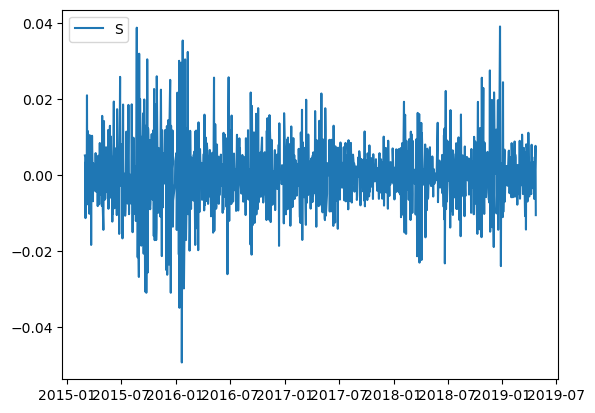

In [22]:
plt.plot(Combined_Returns['Date'], Combined_Returns['S&P500 Returns'])
#Legend
classes ='S&P500 Returns'
plt.legend(labels=classes)

plt.show()


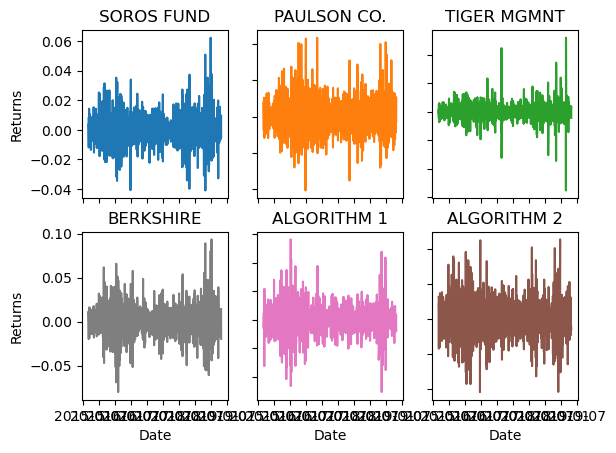

In [23]:
fig, axs = plt.subplots(2, 3)

x=Combined_Returns['Date']

axs[0, 0].plot(x,Combined_Returns['SOROS FUND MANAGEMENT LLC'])
axs[0, 0].set_title('SOROS FUND')

axs[0, 1].plot(x, Combined_Returns['PAULSON & CO.INC. '], 'tab:orange')
axs[0, 1].set_title('PAULSON CO.')

axs[0, 2].plot(x, Combined_Returns['TIGER GLOBAL MANAGEMENT LLC'], 'tab:green')
axs[0, 2].set_title('TIGER MGMNT')

axs[1, 0].plot(x,Combined_Returns['BERKSHIRE HATHAWAY INC'], 'tab:grey')
axs[1, 0].set_title('BERKSHIRE')

axs[1, 1].plot(x,Combined_Returns['FIRST ALGORITHM'], 'tab:pink')
axs[1, 1].set_title('ALGORITHM 1')

axs[1, 2].plot(x,Combined_Returns['SECOND ALGORITHM'], 'tab:brown')
axs[1, 2].set_title('ALGORITHM 2')



for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='Returns')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [24]:
nonSP_Returns= Combined_Returns.drop(columns=["Date","S&P500 Returns"])

Cumulative_Returns= (nonSP_Returns + 1).cumprod()

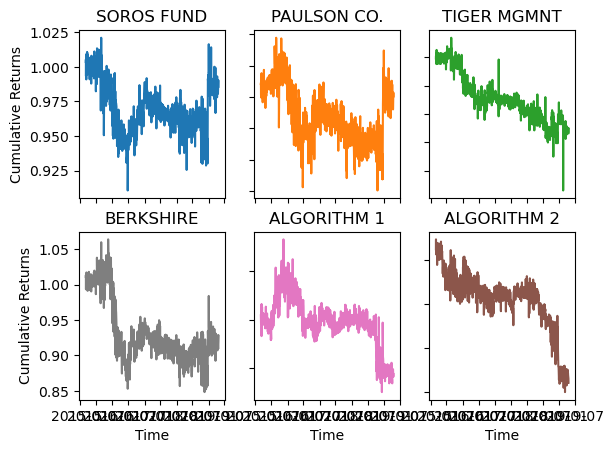

In [25]:
fig, axs = plt.subplots(2, 3)

axs[0, 0].plot(x, Cumulative_Returns['SOROS FUND MANAGEMENT LLC'])
axs[0, 0].set_title('SOROS FUND')

axs[0, 1].plot(x, Cumulative_Returns['PAULSON & CO.INC. '], 'tab:orange')
axs[0, 1].set_title('PAULSON CO.')

axs[0, 2].plot(x, Cumulative_Returns['TIGER GLOBAL MANAGEMENT LLC'], 'tab:green')
axs[0, 2].set_title('TIGER MGMNT')

axs[1, 0].plot(x, Cumulative_Returns['BERKSHIRE HATHAWAY INC'], 'tab:grey')
axs[1, 0].set_title('BERKSHIRE')

axs[1, 1].plot(x, Cumulative_Returns['FIRST ALGORITHM'], 'tab:pink')
axs[1, 1].set_title('ALGORITHM 1')

axs[1, 2].plot(x, Cumulative_Returns['SECOND ALGORITHM'], 'tab:brown')
axs[1, 2].set_title('ALGORITHM 2')



for ax in axs.flat:
    ax.set(xlabel='Time', ylabel='Cumulative Returns')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

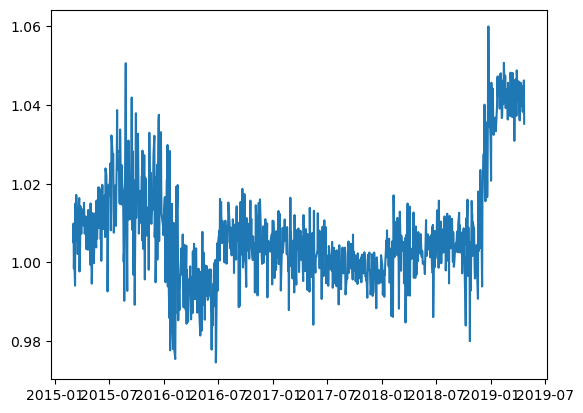

In [26]:
#S&P Scatter Chart
SP_Returns= Combined_Returns["S&P500 Returns"]

Cumulative_Returns_SP= (SP_Returns + 1).cumprod()

plotfig= plt.plot(Combined_Returns['Date'], Cumulative_Returns_SP)



In [27]:
Combined_Returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Date,FIRST ALGORITHM,SECOND ALGORITHM,S&P500 Returns
6,0.003495,0.008222,-0.002038,0.010782,2015-03-03,0.004385,0.01276,0.005159
7,0.001786,0.000835,0.004889,0.002513,2015-03-04,-0.005929,0.011062,0.004715
8,-0.011921,-0.00765,-0.010836,-0.019824,2015-03-05,-0.002488,-0.016729,-0.011316
9,0.008488,0.007799,0.014324,0.011446,2015-03-06,0.002028,0.009179,0.003417
10,-0.010845,-0.009566,-0.017922,-0.008087,2015-03-09,0.000573,-0.002844,-0.007766
...,...,...,...,...,...,...,...,...
1024,-0.005596,-0.006855,-0.003579,0.002385,2019-04-16,-0.000413,-0.007647,0.00335
1025,0.004345,0.007689,0.004991,-0.001306,2019-04-17,0.002299,0.012503,0.001597
1026,-0.004034,-0.008554,-0.004222,-0.003004,2019-04-18,0.002227,-0.002426,-0.006283
1027,0.009753,0.010817,0.010112,0.014365,2019-04-22,-0.008152,-0.004399,0.007696


Text(0.5, 1.0, 'ALGO2')

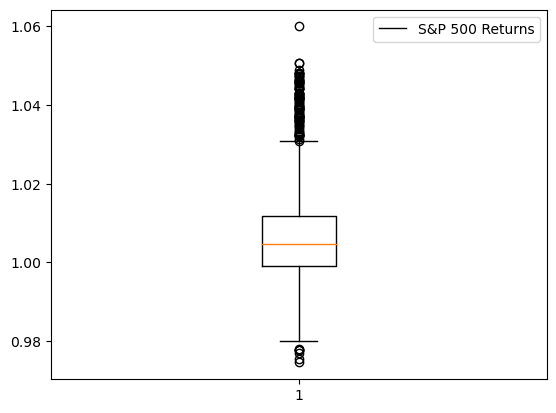

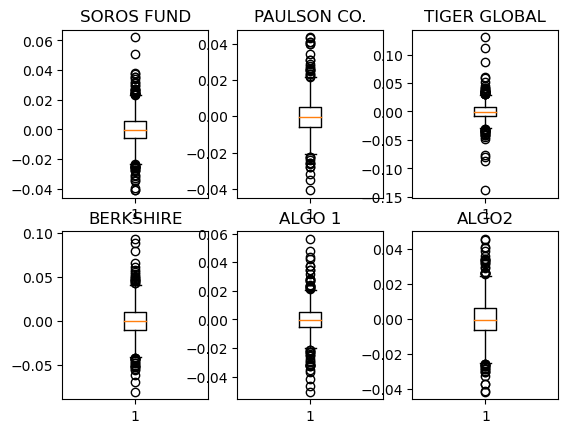

In [28]:
#S&P BoxPlot
plt.boxplot(Cumulative_Returns_SP)
plt.legend(labels=["S&P 500 Returns"])

#Subplot for the remaining figures
fig, axs = plt.subplots(2, 3)

#Soros Boxplot
axs[0, 0].boxplot(Combined_Returns['SOROS FUND MANAGEMENT LLC'])
axs[0, 0].set_title('SOROS FUND')

#Paulson Boxplot
axs[0, 1].boxplot(Combined_Returns['PAULSON & CO.INC. '])
axs[0, 1].set_title('PAULSON CO.')

#Tiger Global Boxplot
axs[0, 2].boxplot(Combined_Returns['TIGER GLOBAL MANAGEMENT LLC'])
axs[0, 2].set_title('TIGER GLOBAL')

#Berkshire Boxplot
axs[1, 0].boxplot(Combined_Returns['BERKSHIRE HATHAWAY INC'])
axs[1, 0].set_title('BERKSHIRE')


#First Algo Boxplot
axs[1, 1].boxplot(Combined_Returns['FIRST ALGORITHM'])
axs[1, 1].set_title('ALGO 1')


#Second Algo Boxplot
axs[1, 2].boxplot(Combined_Returns['SECOND ALGORITHM'])
axs[1, 2].set_title('ALGO2')


In [29]:
#S&P Standard Deviation
spdev=np.std(Combined_Returns['S&P500 Returns'])
print(spdev)

#SOROS Standard Deviation
sorosdev=np.std(Cumulative_Returns['SOROS FUND MANAGEMENT LLC'])
print(sorosdev)

#PAULSON Standard Deviation
p_codev=np.std(Cumulative_Returns['PAULSON & CO.INC. '])
print(p_codev)

#TIGER GLOBAL Standard Deviation
tigerdev=np.std(Cumulative_Returns['TIGER GLOBAL MANAGEMENT LLC'])
print(tigerdev)

#BERKSHIREStandard Deviation
berkdev=np.std(Cumulative_Returns['BERKSHIRE HATHAWAY INC'])
print(berkdev)

#ALGO1 Standard Deviation
alg1dev=np.std(Cumulative_Returns['FIRST ALGORITHM'])
print(alg1dev)

#ALGO2 Standard Deviation
alg2dev=np.std(Cumulative_Returns['SECOND ALGORITHM'])
print(alg2dev)


0.009490363346910256
0.0180474081682302
0.01741497100042771
0.0423955415886599
0.04413277432322416
0.02455498471154254
0.03329131640452814


In [71]:
#Annualized Deviation
spdev_annual=spdev * sqrt(252)
print("S&P Annualized Deviation:", spdev_annual)

sorosdev_annual=sorosdev * sqrt(252)
print("Soros Fund Annualized Deviation:", sorosdev_annual)

p_codev_annual=p_codev * sqrt(252)
print("Paulson Co. Annualized Deviation:",p_codev_annual)

tigerdev_annual=tigerdev * sqrt(252)
print("Tiger GlobalAnnualized Deviation:",tigerdev_annual)

berkdev_annual=berkdev * sqrt(252)
print("Berkshire Annualized Deviation:",berkdev_annual)

alg1dev_annual=alg1dev * sqrt(252)
print("Algo 1 Annualized Deviation:",alg1dev_annual)

alg2dev_annual=alg2dev * sqrt(252)
print("Algo 2 Annualized Deviation:",alg2dev_annual)

S&P Annualized Deviation: 0.15065484760540288
Soros Fund Annualized Deviation: 0.28649372293447717
Paulson Co. Annualized Deviation: 0.2764540941392007
Tiger GlobalAnnualized Deviation: 0.6730083584489419
Berkshire Annualized Deviation: 0.7005860731595281
Algo 1 Annualized Deviation: 0.3897982979624079
Algo 2 Annualized Deviation: 0.5284832641460787


C:\Users\Oluwa\AppData\Local\Temp\ipykernel_1904\4002988197.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  Combined_Rolling_Deviation=Combined_Returns.rolling(21).std()


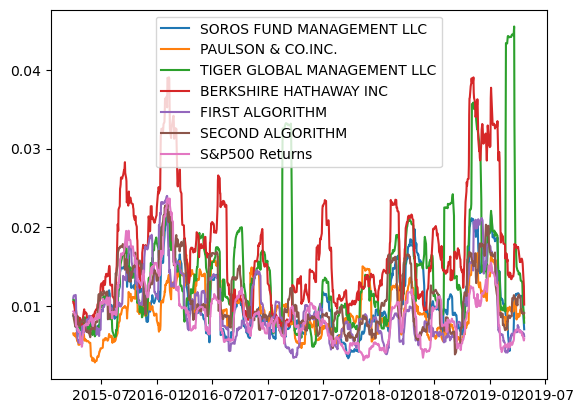

In [31]:
#Rolling Standard Deviatiion
Combined_Rolling_Deviation=Combined_Returns.rolling(21).std()
Clean_Combined_Rolling_Deviation= Combined_Rolling_Deviation.dropna()
Clean_Combined_Rolling_Deviation

plt.plot(Combined_Returns['Date'], Combined_Rolling_Deviation)


#Legend
options =['SOROS FUND MANAGEMENT LLC','PAULSON & CO.INC. ','TIGER GLOBAL MANAGEMENT LLC','BERKSHIRE HATHAWAY INC','FIRST ALGORITHM','SECOND ALGORITHM','S&P500 Returns']
plt.legend(labels=options)
plt.show()


In [32]:
Correlation_Returns = Combined_Returns.drop(columns='Date').fillna(0).corr() 

In [33]:
print(Correlation_Returns)

                             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.676905   
PAULSON & CO.INC.                             0.676905            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.543986            0.427171   
BERKSHIRE HATHAWAY INC                        0.752631            0.526277   
FIRST ALGORITHM                              -0.047044           -0.044505   
SECOND ALGORITHM                             -0.044443            0.005855   
S&P500 Returns                                0.666631            0.483632   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.543986   
PAULSON & CO.INC.                               0.427171   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.414293   
FIRST ALGORITHM                                -0.069538   
SECOND ALGORITH

In [34]:
# No clue for rolling beta 
cov_FirstAlgorithm = np.cov([Combined_Returns['FIRST ALGORITHM'].astype(float), Combined_Returns['S&P500 Returns'].astype(float)])


SP_FirstAlgorithm = Combined_Returns[['FIRST ALGORITHM','S&P500 Returns']]
var_SP = SP_FirstAlgorithm.var( axis=1, ddof=1)

In [35]:
#Exponentially Weighted Average
Combined_Returns.ewm(halflife='21 days', times=pd.DatetimeIndex(Combined_Returns["Date"])).mean()

C:\Users\Oluwa\AppData\Local\Temp\ipykernel_1904\2103880072.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  Combined_Returns.ewm(halflife='21 days', times=pd.DatetimeIndex(Combined_Returns["Date"])).mean()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,FIRST ALGORITHM,SECOND ALGORITHM,S&P500 Returns
6,0.003495,0.008222,-0.002038,0.010782,0.004385,0.012760,0.005159
7,0.002627,0.004467,0.001482,0.006579,-0.000857,0.011897,0.004933
8,-0.002384,0.000294,-0.002760,-0.002514,-0.001419,0.002039,-0.000663
9,0.000470,0.002264,0.001725,0.001151,-0.000514,0.003913,0.000408
10,-0.002072,-0.000394,-0.002690,-0.000925,-0.000270,0.002395,-0.001429
...,...,...,...,...,...,...,...
1024,-0.000166,-0.000284,-0.000181,0.000119,-0.000023,-0.000476,0.000087
1025,0.000040,0.000081,0.000056,0.000054,0.000083,0.000118,0.000156
1026,-0.000144,-0.000309,-0.000137,-0.000084,0.000180,0.000003,-0.000135
1027,0.000341,0.000236,0.000365,0.000624,-0.000228,-0.000213,0.000249


In [36]:
combined_sr = []
for x in Combined_Returns.drop(columns='Date'):
    r = Combined_Returns[x].diff()
    sr = r.mean()/r.std() * np.sqrt(252)
    combined_sr.append(sr)
    
    

In [37]:
#sharpe ratio
combined_sr

[-0.007099793707875681,
 -0.01023525051399638,
 -0.0048686597643276455,
 -0.015288589465705105,
 -0.0012181985050421585,
 -0.014955643477567417,
 -0.015185213763164685]

<BarContainer object of 7 artists>

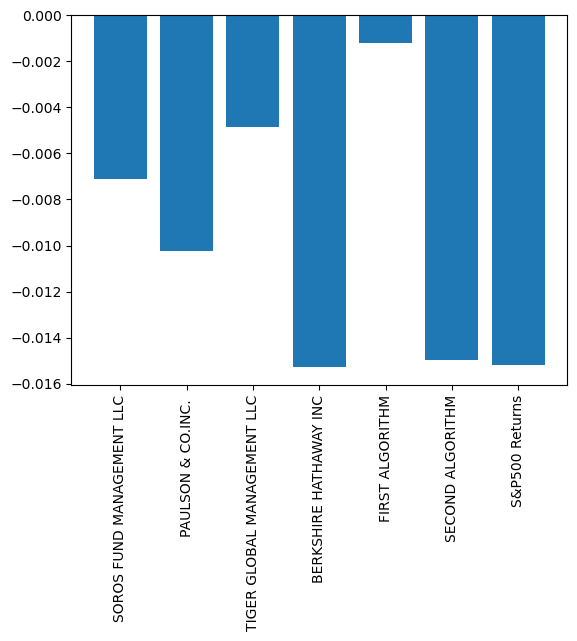

In [38]:
x= Combined_Returns.drop(columns='Date').keys()
plt.xticks(rotation=90)
plt.bar(x,combined_sr)

In [39]:
#The First Algotirthm is showing superior performance according to my calculations. With all portfolios approaching a 0.00 ratio but some doing way better than others. The second algorithm however, is one of the poorer performers only slightly beating out the SP60

In [40]:
#Create Dataframes
NVDA= pd.read_csv(NVDAcsv)
FLWS= pd.read_csv(FLWScsv)
AMD= pd.read_csv(AMDcsv)

In [41]:
NVDA.head


<bound method NDFrame.head of                      Date  Close
0      10/2/2012 16:00:00   3.29
1      10/3/2012 16:00:00   3.26
2      10/4/2012 16:00:00   3.41
3      10/5/2012 16:00:00   3.33
4      10/8/2012 16:00:00   3.29
...                   ...    ...
1816  12/20/2019 16:00:00  59.84
1817  12/23/2019 16:00:00  59.71
1818  12/24/2019 13:00:00  59.66
1819  12/26/2019 16:00:00  59.80
1820  12/27/2019 16:00:00  59.22

[1821 rows x 2 columns]>

In [42]:
FLWS.head

<bound method NDFrame.head of                      Date  Close
0      10/2/2012 16:00:00   3.73
1      10/3/2012 16:00:00   3.76
2      10/4/2012 16:00:00   3.84
3      10/5/2012 16:00:00   3.78
4      10/8/2012 16:00:00   3.82
...                   ...    ...
1816  12/20/2019 16:00:00  14.28
1817  12/23/2019 16:00:00  14.05
1818  12/24/2019 13:00:00  14.22
1819  12/26/2019 16:00:00  14.15
1820  12/27/2019 16:00:00  14.31

[1821 rows x 2 columns]>

In [43]:
AMD.head

<bound method NDFrame.head of                      Date  Close
0      10/2/2012 16:00:00   3.27
1      10/3/2012 16:00:00   3.12
2      10/4/2012 16:00:00   3.22
3      10/5/2012 16:00:00   3.22
4      10/8/2012 16:00:00   3.19
...                   ...    ...
1816  12/20/2019 16:00:00  44.15
1817  12/23/2019 16:00:00  45.46
1818  12/24/2019 13:00:00  46.54
1819  12/26/2019 16:00:00  46.63
1820  12/27/2019 16:00:00  46.18

[1821 rows x 2 columns]>

In [44]:
StocksComb = NVDA.merge(FLWS, on='Date').merge(AMD, on='Date')
StocksCombined=StocksComb.rename(columns={"Close": "AMD","Close_y": "FLWS","Close_x": "NVDA"})


In [45]:
#Returns Calculations
NVDAClose=[]
NVDA_Return=[]
NVDA_Return.append("")
FLWSClose=[]
FLWS_Return=[]
FLWS_Return.append("")
AMDClose=[]
AMD_Return=[]
AMD_Return.append("")
NVDA_data=StocksCombined["NVDA"]
FLWS_data=StocksCombined["FLWS"]
AMD_data=StocksCombined["AMD"]

for x in NVDA_data:
    NVDAClose.append(x)

NumpyNVDA= np.diff(NVDAClose)

for x in NumpyNVDA:
    NVDA_Return.append(x)
    

    
for x in FLWS_data:
    FLWSClose.append(x)

NumpyFLWS= np.diff(FLWSClose)

for x in NumpyFLWS:
    FLWS_Return.append(x)
    
    
for x in AMD_data:
    AMDClose.append(x)

NumpyAMD= np.diff(AMDClose)

for x in NumpyFLWS:
    AMD_Return.append(x)

In [46]:
StocksCombined["NVDA Returns"]=NVDA_Return
StocksCombined["FLWS Returns"]=FLWS_Return
StocksCombined["AMD Returns"]=AMD_Return
Stock_Dataframe= StocksCombined.dropna()

In [47]:
Stock_Dataframe

,Date,NVDA,FLWS,AMD,NVDA Returns,FLWS Returns,AMD Returns
0,10/2/2012 16:00:00,3.29,3.73,3.27,,,
1,10/3/2012 16:00:00,3.26,3.76,3.12,-0.03,0.03,0.03
2,10/4/2012 16:00:00,3.41,3.84,3.22,0.15,0.08,0.08
3,10/5/2012 16:00:00,3.33,3.78,3.22,-0.08,-0.06,-0.06
4,10/8/2012 16:00:00,3.29,3.82,3.19,-0.04,0.04,0.04
...,...,...,...,...,...,...,...
1816,12/20/2019 16:00:00,59.84,14.28,44.15,0.97,0.03,0.03
1817,12/23/2019 16:00:00,59.71,14.05,45.46,-0.13,-0.23,-0.23
1818,12/24/2019 13:00:00,59.66,14.22,46.54,-0.05,0.17,0.17
1819,12/26/2019 16:00:00,59.80,14.15,46.63,0.14,-0.07,-0.07


In [48]:
#Dont Understand The Weights Expectation

In [49]:
#Formating the Date Column for my DataFrame
Stock_Dataframe['Date'] = pd.to_datetime(pd.to_datetime(Stock_Dataframe['Date']).dt.date)


In [60]:
#Combining old and new dataframes
Updated_df= Combined_Returns.merge(Stock_Dataframe, on='Date')

In [61]:
NullOut_df=Updated_df.dropna()

Final_df=NullOut_df.drop(columns=['NVDA', 'FLWS', 'AMD'])
print(Final_df)

     SOROS FUND MANAGEMENT LLC PAULSON & CO.INC.  TIGER GLOBAL MANAGEMENT LLC  \
0                     0.003495           0.008222                   -0.002038   
1                     0.001786           0.000835                    0.004889   
2                    -0.011921           -0.00765                   -0.010836   
3                     0.008488           0.007799                    0.014324   
4                    -0.010845          -0.009566                   -0.017922   
...                        ...                ...                         ...   
1018                 -0.005596          -0.006855                   -0.003579   
1019                  0.004345           0.007689                    0.004991   
1020                 -0.004034          -0.008554                   -0.004222   
1021                  0.009753           0.010817                    0.010112   
1022                 -0.004883          -0.002476                   -0.010472   

     BERKSHIRE HATHAWAY INC

In [75]:
#NVDA Standard Deviation
NVDAdev=np.std(NullOut_df['NVDA Returns'])
print(NVDAdev)

#FLWS Standard Deviation
FLWSdev=np.std(NullOut_df['FLWS Returns'])
print(FLWSdev)

#AMD Standard Deviation
AMDdev=np.std(NullOut_df['AMD Returns'])
print(AMDdev)

print("")
print("Annualized Deviations")
print("---------------------")

#Annualized Deviation
spdev_annual=spdev * sqrt(252)
print("S&P Annualized Deviation:", spdev_annual)

sorosdev_annual=sorosdev * sqrt(252)
print("Soros Fund Annualized Deviation:", sorosdev_annual)

p_codev_annual=p_codev * sqrt(252)
print("Paulson Co. Annualized Deviation:",p_codev_annual)

tigerdev_annual=tigerdev * sqrt(252)
print("Tiger GlobalAnnualized Deviation:",tigerdev_annual)

berkdev_annual=berkdev * sqrt(252)
print("Berkshire Annualized Deviation:",berkdev_annual)

alg1dev_annual=alg1dev * sqrt(252)
print("Algo 1 Annualized Deviation:",alg1dev_annual)

alg2dev_annual=alg2dev * sqrt(252)
print("Algo 2 Annualized Deviation:",alg2dev_annual)

AMDdev_annual=AMDdev * sqrt(252)
print("AMD Annualized Deviation:",AMDdev_annual)

FLWSdev_annual=FLWSdev * sqrt(252)
print("FLWS Annualized Deviation:",FLWSdev_annual)

NVDAdev_annual=NVDAdev * sqrt(252)
print("NVDA Annualized Deviation:",NVDAdev_annual)

1.013905935247793
0.2798591719536561
0.2798591719536561

Annualized Deviations
---------------------
S&P Annualized Deviation: 0.15065484760540288
Soros Fund Annualized Deviation: 0.28649372293447717
Paulson Co. Annualized Deviation: 0.2764540941392007
Tiger GlobalAnnualized Deviation: 0.6730083584489419
Berkshire Annualized Deviation: 0.7005860731595281
Algo 1 Annualized Deviation: 0.3897982979624079
Algo 2 Annualized Deviation: 0.5284832641460787
AMD Annualized Deviation: 4.442626626659019
FLWS Annualized Deviation: 4.442626626659019
NVDA Annualized Deviation: 16.09525774486811


In [82]:
#Rolling Standard Deviatiion
Mega_Rolling_Deviation=Final_df.rolling(21).std()
MegaRoll= Mega_Rolling_Deviation.dropna()


plt.plot(MegaRoll['Date'], MegaRoll)


#Legend
options =['SOROS FUND MANAGEMENT LLC','PAULSON & CO.INC. ','TIGER GLOBAL MANAGEMENT LLC','BERKSHIRE HATHAWAY INC','FIRST ALGORITHM','SECOND ALGORITHM','S&P500 Returns', 'NVDA Returns', 'FLWS Returns', 'AMD Returns']
plt.legend(labels=options)
plt.show()

C:\Users\Oluwa\AppData\Local\Temp\ipykernel_1904\4227894093.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  Mega_Rolling_Deviation=Final_df.rolling(21).std()


KeyError: 'Date'

In [78]:
Final_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Date,FIRST ALGORITHM,SECOND ALGORITHM,S&P500 Returns,NVDA Returns,FLWS Returns,AMD Returns
0,0.003495,0.008222,-0.002038,0.010782,2015-03-03,0.004385,0.01276,0.005159,-0.1,-0.25,-0.25
1,0.001786,0.000835,0.004889,0.002513,2015-03-04,-0.005929,0.011062,0.004715,0.06,-0.03,-0.03
2,-0.011921,-0.00765,-0.010836,-0.019824,2015-03-05,-0.002488,-0.016729,-0.011316,0.11,-0.25,-0.25
3,0.008488,0.007799,0.014324,0.011446,2015-03-06,0.002028,0.009179,0.003417,-0.08,-0.11,-0.11
4,-0.010845,-0.009566,-0.017922,-0.008087,2015-03-09,0.000573,-0.002844,-0.007766,0.01,0.09,0.09
...,...,...,...,...,...,...,...,...,...,...,...
1018,-0.005596,-0.006855,-0.003579,0.002385,2019-04-16,-0.000413,-0.007647,0.00335,0.87,-0.29,-0.29
1019,0.004345,0.007689,0.004991,-0.001306,2019-04-17,0.002299,0.012503,0.001597,-0.23,0.07,0.07
1020,-0.004034,-0.008554,-0.004222,-0.003004,2019-04-18,0.002227,-0.002426,-0.006283,-0.24,-0.02,-0.02
1021,0.009753,0.010817,0.010112,0.014365,2019-04-22,-0.008152,-0.004399,0.007696,0.54,-0.07,-0.07
